In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ticker = "YPF"
data = yf.download(ticker, start="2020-01-01", end="2025-07-23")

C:\Users\Augusto\AppData\Local\Temp\ipykernel_4532\3590631481.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-07-23")


[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,YPF,YPF,YPF,YPF,YPF
Date,,,,,
2020-01-02,11.26,11.53,11.11,11.51,2877600
2020-01-03,11.16,11.49,10.86,11.24,2751900
2020-01-06,11.14,11.19,10.90,11.07,1924200
2020-01-07,10.91,11.18,10.62,11.18,1530700
2020-01-08,10.98,10.99,10.55,10.86,2081000


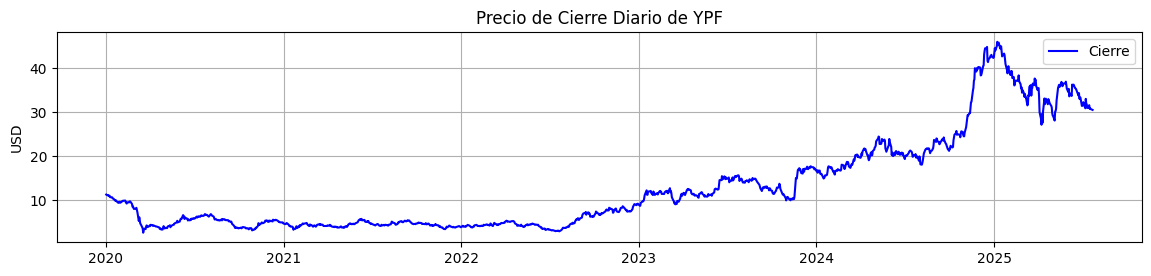

In [4]:
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='Cierre', color='blue')
plt.title('Precio de Cierre Diario de YPF')
plt.ylabel('USD')
plt.grid(True)
plt.legend()

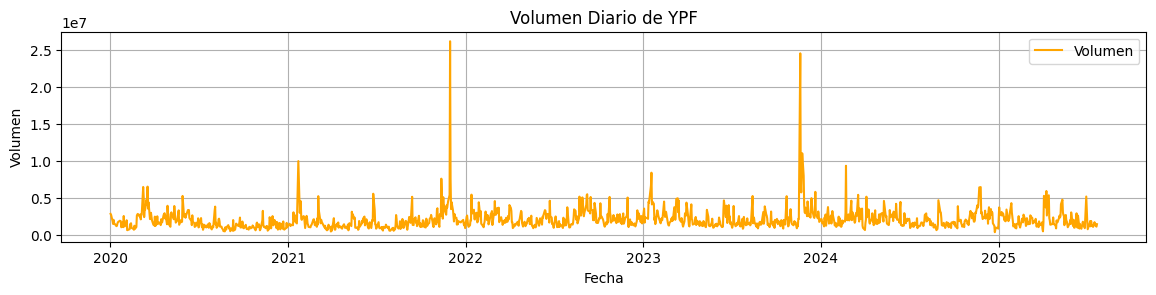

In [5]:
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Volume'], label='Volumen', color='orange')
plt.title('Volumen Diario de YPF')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.grid(True)
plt.legend()

El gráfico anterior representa el **volumen** diario de la acción

El volumen es la cantidad de veces que se compró o se vendió una acción en un día.

Ejemplo sencillo
Imaginá que un día en la Bolsa:

Juan compra 100 acciones de YPF.

María vende 200 acciones.

Pedro compra 50 más.

✅El volumen de ese día sería:
100 + 200 + 50 = 350 acciones.

No importa quién las compró o vendió, sino cuántas veces se intercambiaron.

🔁 ¿Por qué es importante?

📈 Mucho volumen = hay interés, muchos están comprando y vendiendo.

💤 Poco volumen = poca actividad, casi nadie está operando.

#  ¿Qué significa analizar si una serie temporal es caótica?
La Teoría del Caos busca entender si un sistema (en este caso, los precios de una acción) es determinista pero altamente sensible a sus condiciones iniciales. Es decir:

 Aunque no sea aleatorio, es tan sensible que parece impredecible.

Empezaremos con el primer paso serio del análisis caótico:
** Estimar el exponente de Lyapunov.**

 ¿Qué es el exponente de Lyapunov?
Es un número que mide cuánto se separan dos trayectorias que empiezan muy cerca en el tiempo. Si ese número es positivo, estamos ante un sistema caótico.

📉 Exponente negativo → el sistema se estabiliza (no es caótico).

🔁 Exponente cero → sistema periódico (repetitivo).

📈 Exponente positivo → comportamiento caótico.

💡 **Explicación sencilla**

Imaginate que dos inversores compran YPF el mismo día, pero uno lo hace 1 segundo más tarde que el otro.
Si con el tiempo sus decisiones (basadas en los movimientos del precio) se vuelven completamente diferentes, entonces el sistema tiene comportamiento caótico.

In [6]:
!pip install nolds

"pip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [7]:
import nolds

c:\Users\Augusto\AppData\Local\Programs\Python\Python313\Lib\site-packages\nolds\datasets.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Usamos la serie temporal (nos quedamos solo con los valores, sin fechas)

In [8]:
#serie = data['Close'].dropna().values (da error)
serie = data['Close'].dropna().values[-1000:] #cortamos un poco la serie (Esto no afecta la validez del análisis si se hace sobre una porción suficientemente representativa de la dinámica actual.)

Usamos 'adj close' (precio de cierre ajustado) en lugar de 'close' porque es el más confiable para análisis, ya que corrige divisiones de acciones y pagos de dividendos. (me lo recomendaba chatgpt pero yfinance no tiene esa columna para YPF asi que al final no )

In [ ]:
# Cálculo del exponente de Lyapunov (implementación de YPF.py)
serie = data['Close'].dropna().values[-1000:].astype(float).flatten()
Lyapunov = nolds.lyap_r(serie, emb_dim=10, trajectory_len=20)
print("Exponente de Lyapunov:", Lyapunov)

First attempt failed: operands could not be broadcast together with shapes (999,) (999,1000) 
Trying with different parameters or method.
Second attempt also failed: operands could not be broadcast together with shapes (999,) (999,1000) 
Could not calculate Lyapunov exponent with the attempted methods.


nolds.lyap_r(...): función que estima el exponente de Lyapunov con el método de Rosenstein.

serie: los precios ajustados, sin fechas.

emb_dim=10: es la dimensión de embedding: cuánto "contexto" se usa para reconstruir el sistema.

Es como decir: "mirá los últimos 10 días para ver hacia dónde va la serie".

Se puede probar con otros valores (6 a 12 suelen estar bien para datos financieros).

In [10]:
print("Exponente de Lyapunov:", Lyapunov)


Exponente de Lyapunov: None
